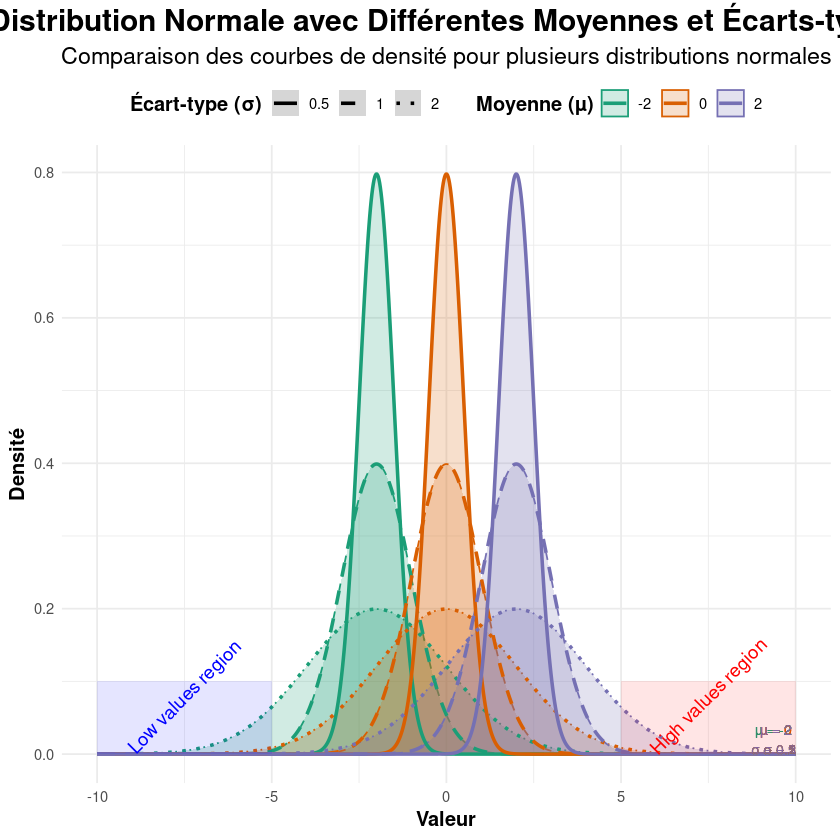

In [5]:
# Définir les paramètres des différentes distributions normales
params <- expand.grid(mu = c(-2, 0, 2), sigma = c(0.5, 1, 2))

# Fonction pour générer les données de la distribution normale
generate_normal_data <- function(mu, sigma, n = 1000) {
  data.frame(
    x = seq(-10, 10, length.out = n),
    y = dnorm(seq(-10, 10, length.out = n), mean = mu, sd = sigma),
    mu = factor(mu),
    sigma = factor(sigma)
  )
}

# Générer les données pour chaque combinaison de mu et sigma
data_list <- mapply(generate_normal_data, params$mu, params$sigma, SIMPLIFY = FALSE)
data <- do.call(rbind, data_list)
ggplot(data, aes(x = x, y = y, color = mu, linetype = sigma, fill = mu)) +
  geom_area(alpha = 0.2, position = 'identity') +
  geom_line(size = 1) +
  labs(
    title = "Distribution Normale avec Différentes Moyennes et Écarts-types",
    subtitle = "Comparaison des courbes de densité pour plusieurs distributions normales",
    x = "Valeur",
    y = "Densité",
    color = "Moyenne (µ)",
    linetype = "Écart-type (σ)",
    fill = "Moyenne (µ)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 14),
    axis.title = element_text(face = "bold", size = 12),
    legend.title = element_text(face = "bold", size = 12),
    legend.position = "top"
  ) +
  scale_color_brewer(palette = "Dark2") +
  scale_fill_brewer(palette = "Dark2") +
  scale_linetype_manual(values = c("solid", "dashed", "dotted")) +
  geom_text(data = data %>% filter(x == max(x)), aes(label = paste("µ =", mu, "\nσ =", sigma)),
            position = position_nudge(y = 0.02), hjust = 1, size = 3, show.legend = FALSE) +
  annotate("rect", xmin = -10, xmax = -5, ymin = 0, ymax = 0.1, alpha = .1, fill = "blue") +
  annotate("text", x = -7.5, y = 0.08, label = "Low values region", size = 4, color = "blue", angle = 45) +
  annotate("rect", xmin = 5, xmax = 10, ymin = 0, ymax = 0.1, alpha = .1, fill = "red") +
  annotate("text", x = 7.5, y = 0.08, label = "High values region", size = 4, color = "red", angle = 45)
